In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
print("The Mnist has training dataset of %d examples" %len(X_train))
print("The Mnist has testing dataset of %d examples" %len(X_test))

The Mnist has training dataset of 60000 examples
The Mnist has testing dataset of 10000 examples


In [ ]:
#Visualizing first 6 training dataset

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

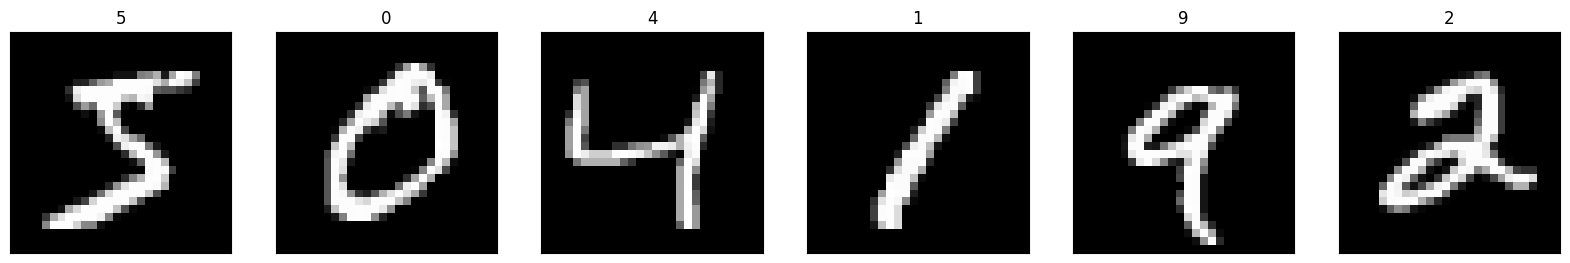

In [ ]:
fig=plt.figure(figsize=(20,20))
for i in range(6):
  ax=fig.add_subplot(1,6,i+1,xticks=[],yticks=[])
  ax.imshow(X_train[i],cmap='gray')
  ax.set_title(str(Y_train[i]))

In [ ]:
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

In [ ]:
print("X_train shape : ",X_train.shape)

X_train shape :  (60000, 28, 28)


In [ ]:
from keras import utils

In [ ]:
num_classes=10
print("Integer valued labels:")
print(Y_train[:6])
Y_train=utils.to_categorical(Y_train,num_classes)
Y_test=utils.to_categorical(Y_test,num_classes)
print("One hot labels:")
print(Y_train[:6])

Integer valued labels:
[5 0 4 1 9 2]
One hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
img_rows,img_cols=28,28
X_train=X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
input_shape=(img_rows,img_cols,1)
print("Input shape: ",input_shape)
print("x_train shape: ",X_train.shape)

Input shape:  (28, 28, 1)
x_train shape:  (60000, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,GlobalAveragePooling2D


In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)
hist = model.fit(X_train, Y_train, batch_size=64, epochs=10, validation_data=(X_test,Y_test), callbacks=[checkpointer], verbose=2, shuffle=True)



Epoch 1/10

Epoch 1: val_loss improved from inf to 0.04169, saving model to model.weights.best.hdf5
938/938 - 72s - loss: 0.1589 - accuracy: 0.9524 - val_loss: 0.0417 - val_accuracy: 0.9859 - 72s/epoch - 77ms/step
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.04169 to 0.03636, saving model to model.weights.best.hdf5
938/938 - 70s - loss: 0.0466 - accuracy: 0.9856 - val_loss: 0.0364 - val_accuracy: 0.9882 - 70s/epoch - 75ms/step
Epoch 3/10

Epoch 3: val_loss improved from 0.03636 to 0.03289, saving model to model.weights.best.hdf5
938/938 - 70s - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0329 - val_accuracy: 0.9900 - 70s/epoch - 75ms/step
Epoch 4/10

Epoch 4: val_loss improved from 0.03289 to 0.02659, saving model to model.weights.best.hdf5
938/938 - 70s - loss: 0.0250 - accuracy: 0.9918 - val_loss: 0.0266 - val_accuracy: 0.9900 - 70s/epoch - 75ms/step
Epoch 5/10

Epoch 5: val_loss improved from 0.02659 to 0.02611, saving model to model.weights.best.hdf5
938/938 - 68s - loss: 0.0190 - accuracy: 0.9941 - val_loss: 0.0261 - val_accuracy: 0.9913 - 68s/epoch - 72ms/step
Epoch 6/10

Epoch 6: val_loss did not improve from 0.02611
938/938 - 67s - loss: 0.0153 - accuracy: 0.9953 - val_loss: 0.0318 - val_accurac

In [ ]:
model.load_weights('model.weights.best.hdf5')

In [ ]:
score=model.evaluate(X_test,Y_test,verbose=0)
accuracy=100*score[1]
print("Test accuracy: ",accuracy)

Test accuracy:  99.12999868392944


In [ ]:
y_pred=model.predict(X_test)

313/313 [==============================] - 4s 14ms/step


In [ ]:
y_pred= np.argmax(y_pred, axis=1)

In [ ]:
y_pred[0]

7

In [ ]:
y=np.argmax(Y_test[0])

In [ ]:
y

7

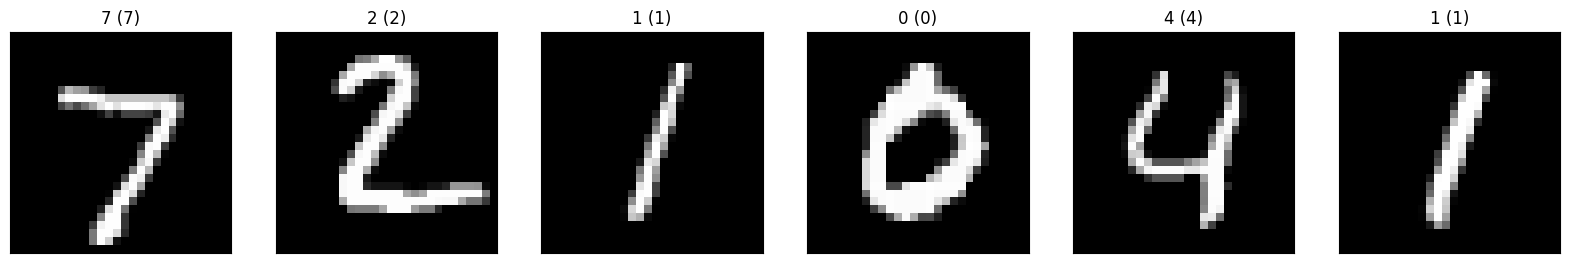

In [113]:
fig=plt.figure(figsize=(20,20))
for i in range(6):
  ax=fig.add_subplot(1,6,i+1,xticks=[],yticks=[])
  ax.imshow(X_test[i],cmap='gray')
  ax.set_title("{} ({})".format(y_pred[i],np.argmax(Y_test[i])))